In [196]:
import matplotlib.pyplot as plt
import torchvision
from pathlib import Path
import torch

from torch import nn
from torchvision import transforms
from scripts import data_setup, engine, utils
import torchinfo

In [182]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [183]:
data_path = Path("data/")
image_path = data_path / "soil_low_med_high"

In [184]:
# Get a set of pretrained model weights
weights = torchvision.models.AlexNet_Weights.DEFAULT
weights
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [185]:
#HyperParameters
batch_Size = 4
learning_rate = 0.001
epochS = 10
dropout_prob = 0.2

In [186]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

In [187]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=batch_Size)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x1e6b6ec29c0>,
 ['high', 'low', 'medium'])

In [188]:
model = torchvision.models.alexnet(weights=weights).to(device)

In [189]:
# # Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.parameters():
    param.requires_grad = False

In [190]:
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = nn.Sequential(
    nn.Dropout(p=dropout_prob, inplace=True), 
    nn.Linear(in_features=9216, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [191]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [192]:

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=epochS,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

 10%|█         | 1/10 [00:18<02:49, 18.88s/it]

Epoch: 1 | train_loss: 1.5580 | train_acc: 0.3929 | test_loss: 0.7752 | test_acc: 0.6667


 20%|██        | 2/10 [00:36<02:26, 18.27s/it]

Epoch: 2 | train_loss: 0.3491 | train_acc: 0.8571 | test_loss: 0.8770 | test_acc: 0.7917


 30%|███       | 3/10 [00:56<02:11, 18.81s/it]

Epoch: 3 | train_loss: 0.1487 | train_acc: 0.9405 | test_loss: 0.4480 | test_acc: 0.7917


 40%|████      | 4/10 [01:15<01:53, 18.93s/it]

Epoch: 4 | train_loss: 0.0662 | train_acc: 0.9881 | test_loss: 0.4799 | test_acc: 0.7917


 50%|█████     | 5/10 [01:33<01:34, 18.84s/it]

Epoch: 5 | train_loss: 0.0432 | train_acc: 1.0000 | test_loss: 0.5523 | test_acc: 0.7917


 60%|██████    | 6/10 [01:51<01:13, 18.46s/it]

Epoch: 6 | train_loss: 0.0300 | train_acc: 1.0000 | test_loss: 0.4789 | test_acc: 0.7917


 70%|███████   | 7/10 [02:09<00:54, 18.12s/it]

Epoch: 7 | train_loss: 0.0219 | train_acc: 1.0000 | test_loss: 0.5062 | test_acc: 0.7500


 80%|████████  | 8/10 [02:26<00:35, 17.91s/it]

Epoch: 8 | train_loss: 0.0168 | train_acc: 1.0000 | test_loss: 0.4821 | test_acc: 0.7917


 90%|█████████ | 9/10 [02:43<00:17, 17.60s/it]

Epoch: 9 | train_loss: 0.0163 | train_acc: 1.0000 | test_loss: 0.5163 | test_acc: 0.7500


100%|██████████| 10/10 [03:00<00:00, 18.09s/it]

Epoch: 10 | train_loss: 0.0114 | train_acc: 1.0000 | test_loss: 0.4859 | test_acc: 0.8333
[INFO] Total training time: 180.872 seconds


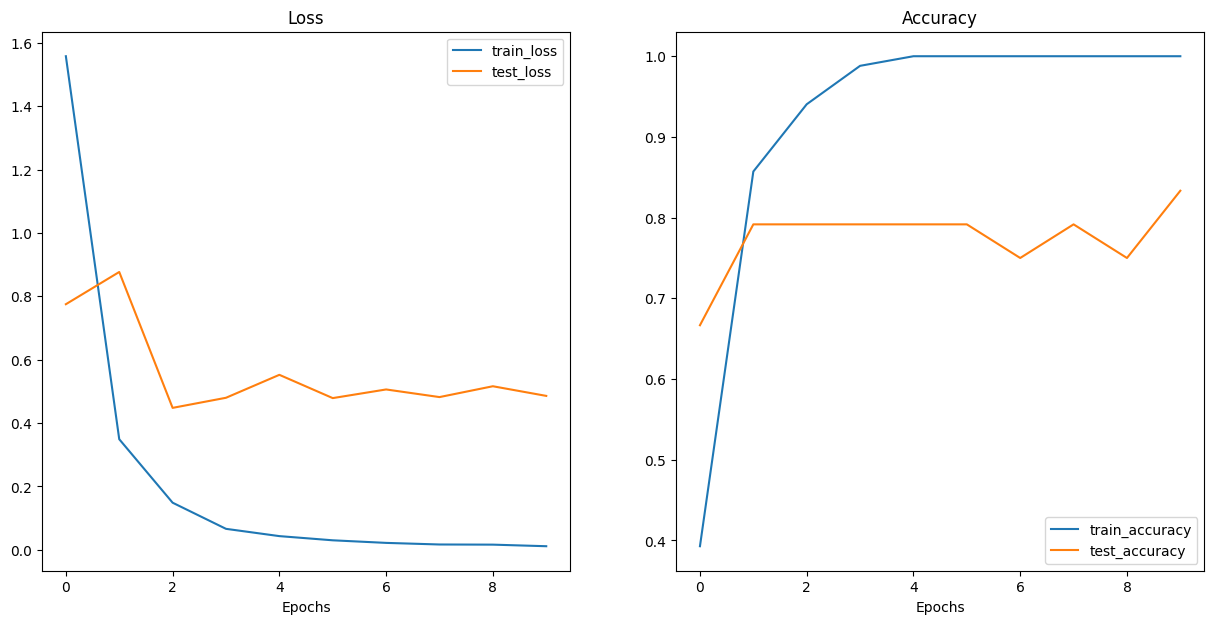

In [193]:
from scripts.helper_functions import plot_loss_curves

plot_loss_curves(results)

In [194]:
from winsound import Beep
Beep(300, 200)

In [ ]:
# utils.save_model(model=model,
#                  target_dir="models",
#                  model_name="alexnet1.pth")

[INFO] Saving model to: models\alexnet1.pth
